In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install opencv-python   # This is the package for 'cv2'
!pip install tensorflow
!pip install scikit-learn    # This is the package for 'sklearn'

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Tensorflow version: ", tf.__version__)

seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

Tensorflow version:  2.19.0


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parsasam/captcha-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'captcha-dataset' dataset.
Path to dataset files: /kaggle/input/captcha-dataset


Number of images found:  113062
Shape of image:  (40, 150, 3)
Shape of image:  (40, 150, 3)
Shape of image:  (40, 150, 3)
Shape of image:  (40, 150, 3)


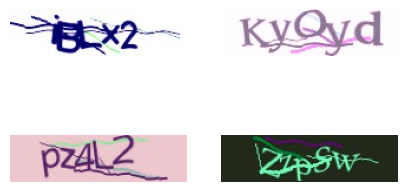

In [4]:
from pathlib import Path
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import cv2 # Import cv2 for image operations

# Path to the data directory
# Correcting the path to point to the actual image samples within the downloaded dataset
data_dir = Path(path)


# Get list of all the images
images = list(data_dir.glob("*.jpg")) # Changed to .jpg as per inspection
print("Number of images found: ", len(images))


# Let's take a look at some samples first.
# Always look at your data!
sample_images = images[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

In [5]:
import os

# List contents of the downloaded dataset path to identify the correct image directory
print(f"Contents of {path}:")
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        if f.endswith('.png') or f.endswith('.jpg'): # Only show image files or a few general files for brevity
            print(f'{subindent}{f}')
        elif len(files) > 5 and files.index(f) == 5:
            print(f'{subindent}...')
            break


Streaming output truncated to the last 5000 lines.
    bamLD.jpg
    38R8S.jpg
    n7iMg.jpg
    OlleB.jpg
    T7K4N.jpg
    jc51F.jpg
    742uH.jpg
    nakZB.jpg
    1dR1A.jpg
    GrPm6.jpg
    yMAZM.jpg
    WUkbr.jpg
    TAUee.jpg
    Kgc8F.jpg
    dMBkC.jpg
    Xk3TH.jpg
    35JZv.jpg
    35Pri.jpg
    Cs7Ue.jpg
    sLqBc.jpg
    lz6KT.jpg
    KLNay.jpg
    YOys7.jpg
    K11ZD.jpg
    wapQ8.jpg
    iafHa.jpg
    GgFhx.jpg
    vVTgx.jpg
    wlxUa.jpg
    QX6ma.jpg
    jJPfY.jpg
    xpuD6.jpg
    T4EGn.jpg
    GEfpj.jpg
    dSyJM.jpg
    gPscR.jpg
    UIydx.jpg
    qVJqN.jpg
    S4R1s.jpg
    sshR5.jpg
    3FV5N.jpg
    3GCSp.jpg
    386dB.jpg
    kbDeg.jpg
    Jpllr.jpg
    CCQX5.jpg
    1Xk8d.jpg
    4AYGe.jpg
    RGUzO.jpg
    mx5dO.jpg
    jsHwN.jpg
    e23v3.jpg
    nWdLY.jpg
    XAxtT.jpg
    QZd5C.jpg
    wknPq.jpg
    hiy3J.jpg
    pVPxy.jpg
    PQNNi.jpg
    12Agx.jpg
    VknZf.jpg
    hak36.jpg
    dBIaW.jpg
    fKlGi.jpg
    sjRDt.jpg
    yS98t.jpg
    E666C.jpg
    qcFaP.j

In [6]:
# Store all the characters in a set
characters = set()

# A list to store the length of each captcha
captcha_length = []

# Store image-label info
dataset = []

# Iterate over the dataset and store the
# information needed
for img_path in images:
    # 1. Get the label associated with each image
    label = img_path.name.split(".jpg")[0] # Changed to .jpg
    # 2. Store the length of this cpatcha
    captcha_length.append(len(label))
    # 3. Store the image-label pair info
    dataset.append((str(img_path), label))

    # 4. Store the characters present
    for ch in label:
        characters.add(ch)

# Sort the characters
characters = sorted(characters)

# Convert the dataset info into a dataframe
dataset = pd.DataFrame(dataset, columns=["img_path", "label"], index=None)

# Shuffle the dataset
dataset = dataset.sample(frac=1.).reset_index(drop=True)


print("Number of unqiue charcaters in the whole dataset: ", len(characters))
print("Maximum length of any captcha: ", max(Counter(captcha_length).keys()))
print("Characters present: ", characters)
print("Total number of samples in the dataset: ", len(dataset))
dataset.head()

Number of unqiue charcaters in the whole dataset:  60
Maximum length of any captcha:  5
Characters present:  ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total number of samples in the dataset:  113062


,img_path,label
0,/kaggle/input/captcha-dataset/BLPME.jpg,BLPME
1,/kaggle/input/captcha-dataset/nbAkc.jpg,nbAkc
2,/kaggle/input/captcha-dataset/Hq5xK.jpg,Hq5xK
3,/kaggle/input/captcha-dataset/3hTZl.jpg,3hTZl
4,/kaggle/input/captcha-dataset/zPeDx.jpg,zPeDx


In [7]:
import numpy as np

# Sample 10% of the dataset (reduced from 50% to make training faster)
sampled_dataset = dataset.sample(frac=0.1, random_state=seed).reset_index(drop=True)

# Split the sampled dataset into training and validation sets
training_data, validation_data = train_test_split(sampled_dataset, test_size=0.1, random_state=seed)

training_data = training_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)

print("Number of training samples: ", len(training_data))
print("Number of validation samples: ", len(validation_data))



# Map text to numeric labels
char_to_labels = {char:idx for idx, char in enumerate(characters)}

# Map numeric labels to text
labels_to_char = {val:key for key, val in char_to_labels.items()}



# Sanity check for corrupted images
def is_valid_captcha(captcha):
    for ch in captcha:
        if not ch in characters:
            return False
    return True



# Store arrays in memory as it's not a muvh big dataset
def generate_arrays(df, resize=True, img_height=50, img_width=200):
    """Generates image array and labels array from a dataframe.

    Args:
        df: dataframe from which we want to read the data
        resize (bool)    : whether to resize images or not
        img_weidth (int): width of the resized images
        img_height (int): height of the resized images

    Returns:
        images (ndarray): grayscale images
        labels (ndarray): corresponding encoded labels
    """

    num_items = len(df)
    images = np.zeros((num_items, img_height, img_width), dtype=np.float32)
    labels = [0]*num_items

    for i in range(num_items):
        img = cv2.imread(df["img_path"][i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        if resize:
            img = cv2.resize(img, (img_width, img_height))

        img = (img/255.).astype(np.float32)
        label = df["label"][i]

        # Add only if it is a valid captcha
        if is_valid_captcha(label):
            images[i, :, :] = img
            labels[i] = label

    return images, np.array(labels)



# Build training data
training_data, training_labels = generate_arrays(df=training_data)
print("Number of training images: ", training_data.shape)
print("Number of training labels: ", training_labels.shape)


# Build validation data
validation_data, validation_labels = generate_arrays(df=validation_data)
print("Number of validation images: ", validation_data.shape)
print("Number of validation labels: ", validation_labels.shape)

Number of training samples:  10175
Number of validation samples:  1131
Number of training images:  (10175, 50, 200)
Number of training labels:  (10175,)
Number of validation images:  (1131, 50, 200)
Number of validation labels:  (1131,)


In [8]:
class DataGenerator(keras.utils.Sequence):
    """Generates batches from a given dataset.

    Args:
        data: training or validation data
        labels: corresponding labels
        char_map: dictionary mapping char to labels
        batch_size: size of a single batch
        img_width: width of the resized
        img_height: height of the resized
        downsample_factor: by what factor did the CNN downsample the images
        max_length: maximum length of any captcha
        shuffle: whether to shuffle data or not after each epoch
    Returns:
        batch_inputs: a dictionary containing batch inputs
        batch_labels: a batch of corresponding labels
    """

    def __init__(self,
                 data,
                 labels,
                 char_map,
                 batch_size=16,
                 img_width=200,
                 img_height=50,
                 downsample_factor=4,
                 max_length=5,
                 shuffle=True
                ):
        self.data = data
        self.labels = labels
        self.char_map = char_map
        self.batch_size = batch_size
        self.img_width = img_width
        self.img_height = img_height
        self.downsample_factor = downsample_factor
        self.max_length = max_length
        self.shuffle = shuffle
        self.indices = np.arange(len(data))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def __getitem__(self, idx):
        # 1. Get the next batch indices
        curr_batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]

        # 2. This isn't necessary but it can help us save some memory
        # as not all batches the last batch may not have elements
        # equal to the batch_size
        batch_len = len(curr_batch_idx)

        # 3. Instantiate batch arrays
        batch_images = np.ones((batch_len, self.img_width, self.img_height, 1),
                               dtype=np.float32)
        batch_labels = np.ones((batch_len, self.max_length), dtype=np.float32)
        input_length = np.ones((batch_len, 1), dtype=np.int64) * \
                                (self.img_width // self.downsample_factor - 2)
        label_length = np.zeros((batch_len, 1), dtype=np.int64)


        for j, idx in enumerate(curr_batch_idx):
            # 1. Get the image and transpose it
            img = self.data[idx].T
            # 2. Add extra dimenison
            img = np.expand_dims(img, axis=-1)
            # 3. Get the correpsonding label
            text = self.labels[idx]
            # 4. Include the pair only if the captcha is valid
            if is_valid_captcha(text):
                label = [self.char_map[ch] for ch in text]
                batch_images[j] = img
                batch_labels[j] = label
                label_length[j] = len(text)

        batch_inputs = {
                'input_data': batch_images,
                'input_label': batch_labels,
                'input_length': input_length,
                'label_length': label_length,
                }
        return batch_inputs, np.zeros(batch_len).astype(np.float32)


    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [9]:
# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width=200
img_height=50

# Factor  by which the image is going to be downsampled
# by the convolutional blocks
downsample_factor=4

# Maximum length of any captcha in the data
max_length=5

# Get a generator object for the training data
train_data_generator = DataGenerator(data=training_data,
                                     labels=training_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=True
                                    )

# Get a generator object for the validation data
valid_data_generator = DataGenerator(data=validation_data,
                                     labels=validation_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=False
                                    )

In [10]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # On test time, just return the computed loss
        return loss



def build_model():
    # Inputs to the model
    input_img = layers.Input(shape=(img_width, img_height, 1),
                            name='input_data',
                            dtype='float32')
    labels = layers.Input(name='input_label', shape=[max_length], dtype='float32')
    input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length = layers.Input(name='label_length', shape=[1], dtype='int64')

    # First conv block
    x = layers.Conv2D(32,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv1')(input_img)
    x = layers.MaxPooling2D((2,2), name='pool1')(x)

    # Second conv block
    x = layers.Conv2D(64,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv2')(x)
    x = layers.MaxPooling2D((2,2), name='pool2')(x)

    # We have used two max pool with pool size and strides of 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing it to RNNs
    new_shape = ((img_width // 4), (img_height // 4)*64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128,
                                         return_sequences=True,
                                         dropout=0.2))(x)
    x = layers.Bidirectional(layers.LSTM(64,
                                         return_sequences=True,
                                         dropout=0.25))(x)

    # Predictions
    x = layers.Dense(len(characters)+1,
              activation='softmax',
              name='dense2',
              kernel_initializer='he_normal')(x)

    # Calculate CTC
    output = CTCLayer(name='ctc_loss')(labels, x, input_length, label_length)

    # Define the model
    model = keras.models.Model(inputs=[input_img,
                                       labels,
                                       input_length,
                                       label_length],
                                outputs=output,
                                name='ocr_model_v1')

    # Optimizer: Changed from SGD to Adam
    adam = keras.optimizers.Adam(learning_rate=0.001)

    # Compile the model and return
    model.compile(optimizer=adam)
    return model

In [11]:
model = build_model()
model.summary()

Model: "ocr_model_v1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_data          │ (None, 200, 50,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 200, 50,   │        320 │ input_data[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 100, 25,   │          0 │ Conv1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 100, 25,   │     18,496 │ pool1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 50, 12,    │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 50, 768)   │          0 │ pool2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 50, 64)    │     49,216 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 50, 64)    │          0 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 50, 256)   │    197,632 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 50, 128)   │    164,352 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_label         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 50, 61)    │      7,869 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_length        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label_length        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ctc_loss (CTCLayer) │ (None, 1)         │          0 │ input_label[0][0… │
│                     │                   │            │ dense2[0][0],     │
│                     │                   │            │ input_length[0][… │
│                     │                   │            │ label_length[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 437,885 (1.67 MB)

 Trainable params: 437,885 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Add early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=5,
                                   restore_best_weights=True)

# Train the model
history = model.fit(train_data_generator,
                    validation_data=valid_data_generator,
                    epochs=50,
                    callbacks=[es])

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


636/636 ━━━━━━━━━━━━━━━━━━━━ 219s 329ms/step - loss: 423.4273 - val_loss: 352.9018
Epoch 2/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 206s 324ms/step - loss: 349.0974 - val_loss: 336.1011
Epoch 3/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 205s 322ms/step - loss: 336.9850 - val_loss: 335.7579
Epoch 4/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 205s 323ms/step - loss: 337.3449 - val_loss: 335.5852
Epoch 5/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 202s 318ms/step - loss: 336.3417 - val_loss: 335.6500
Epoch 6/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 204s 321ms/step - loss: 336.5353 - val_loss: 335.4830
Epoch 7/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 203s 320ms/step - loss: 336.0280 - val_loss: 335.4761
Epoch 8/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 204s 321ms/step - loss: 336.0735 - val_loss: 333.7937
Epoch 9/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 262s 320ms/step - loss: 334.4829 - val_loss: 329.9641
Epoch 10/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 206s 324ms/step - loss: 329.4138 - val_loss: 320.4149
Epoch 11/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 261s 322ms/step - loss: 319.3

In [14]:
prediction_model = keras.models.Model(
    inputs=model.get_layer(name='input_data').output,
    outputs=model.get_layer(name='dense2').output
)
prediction_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_data (InputLayer)         │ (None, 200, 50, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 200, 50, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 100, 25, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 100, 25, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 50, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 768)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 50, 64)         │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 256)        │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 50, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 50, 61)         │         7,869 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,885 (1.67 MB)

 Trainable params: 437,885 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# A utility to decode the output of the network
def decode_batch_predictions(pred):
    pred = pred[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]

    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred,
                                        input_length=input_len,
                                        greedy=True)[0][0]

    # Iterate over the results and get back the text
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += labels_to_char[c]
        output_text.append(outstr)

    # return final text results
    return output_text

In [16]:
#  Let's check results on some validation samples
for p, (inp_value, _) in enumerate(valid_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']
    labels = inp_value['input_label']

    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)


    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)

    for i in range(bs):
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Ground truth: X4I97 	 Predicted: X4I97
Ground truth: s5jkG 	 Predicted: S3JkC
Ground truth: JfAVO 	 Predicted: JFAYQ
Ground truth: EUX8h 	 Predicted: LUX8H
Ground truth: 23Mdv 	 Predicted: 2AqY
Ground truth: aYNEH 	 Predicted: aWEH
Ground truth: IWOaz 	 Predicted: IWOaz
Ground truth: Txx2G 	 Predicted: FXx2O
Ground truth: pRNU2 	 Predicted: pRNU2
Ground truth: TGW3h 	 Predicted: TcW3h
Ground truth: RpIVS 	 Predicted: RHhvs
Ground truth: eYUfU 	 Predicted: eYUuU
Ground truth: EJZB4 	 Predicted: EJZB4
Ground truth: CRzxL 	 Predicted: qRzxL
Ground truth: JGV9Y 	 Predicted: JgV9Y
Ground truth: rcjhc 	 Predicted: RC9hG


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Ground truth: X4I97 	 Predicted: X4I97
Ground truth: s5jkG 	 Predicted: S3JkC
Ground truth: JfAVO 	 Predicted: JFAYQ
Ground truth: EUX8h 	 Predicted: LUX8H
Ground truth: 23Mdv 	 Predicted: 2AqY
Ground truth: aYNEH 	 Predicted: aWEH
Ground truth: IWOaz 	 Predicted: IWOaz
Ground truth: Txx2G 	 Predicted: FXx2O
Ground truth: pRNU2 	 Predicted: pRNU2
Ground truth: TGW3h 	 Predicted: TcW3h
Ground truth: RpIVS 	 Predicted: RHhvs
Ground truth: eYUfU 	 Predicted: eYUuU
Ground truth: EJZB4 	 Predicted: EJZB4
Ground truth: CRzxL 	 Predicted: qRzxL
Ground truth: JGV9Y 	 Predicted: JgV9Y
Ground truth: rcjhc 	 Predicted: RC9hG


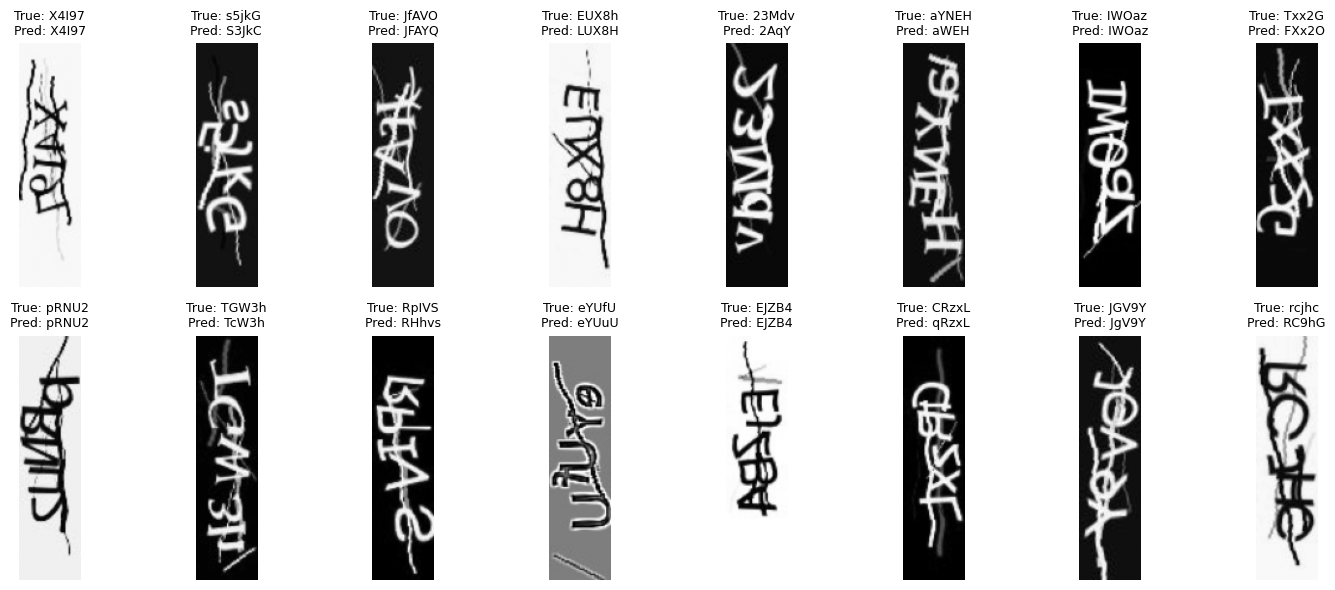

In [17]:
import matplotlib.pyplot as plt

# Doğrulama verilerinden ilk batch'i al
for p, (inp_value, _) in enumerate(valid_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']  # (batch, 50, 200, 1)
    labels = inp_value['input_label']  # ground truth label dizileri

    # Tahmin yap
    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)

    # Gerçek etiketleri karaktere çevir
    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)

    # Görselleştir
    plt.figure(figsize=(15, 6))
    for i in range(bs):
        img = X_data[i].squeeze()  # (50, 200)
        ax = plt.subplot(2, (bs + 1) // 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {orig_texts[i]}\nPred: {pred_texts[i]}', fontsize=9)
        plt.axis('off')
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')

    plt.tight_layout()
    plt.show()
    break  # sadece bir batch göster


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Ground truth: X4I97 	 Predicted: X4I97
Ground truth: s5jkG 	 Predicted: S3JkC
Ground truth: JfAVO 	 Predicted: JFAYQ
Ground truth: EUX8h 	 Predicted: LUX8H
Ground truth: 23Mdv 	 Predicted: 2AqY
Ground truth: aYNEH 	 Predicted: aWEH
Ground truth: IWOaz 	 Predicted: IWOaz
Ground truth: Txx2G 	 Predicted: FXx2O
Ground truth: pRNU2 	 Predicted: pRNU2
Ground truth: TGW3h 	 Predicted: TcW3h
Ground truth: RpIVS 	 Predicted: RHhvs
Ground truth: eYUfU 	 Predicted: eYUuU
Ground truth: EJZB4 	 Predicted: EJZB4
Ground truth: CRzxL 	 Predicted: qRzxL
Ground truth: JGV9Y 	 Predicted: JgV9Y
Ground truth: rcjhc 	 Predicted: RC9hG


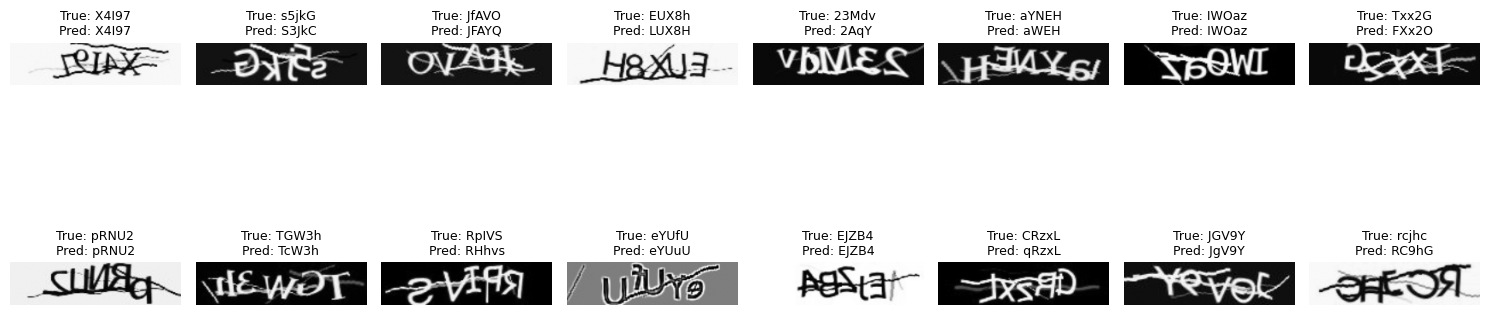

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Doğrulama verilerinden ilk batch'i al
for p, (inp_value, _) in enumerate(valid_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']  # (batch, 50, 200, 1)
    labels = inp_value['input_label']  # ground truth label dizileri

    # Tahmin yap
    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)

    # Gerçek etiketleri karaktere çevir
    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)

    # Görselleştir
    plt.figure(figsize=(15, 6))
    for i in range(bs):
        img = X_data[i].squeeze()  # (50, 200)

        # ✅ Sadece 90 derece sağa döndür (clockwise)
        img_corrected = np.rot90(img, k=-1)  # k=-1 saat yönü
        ax = plt.subplot(2, (bs + 1) // 2, i + 1)
        plt.imshow(img_corrected, cmap='gray')
        plt.title(f'True: {orig_texts[i]}\nPred: {pred_texts[i]}', fontsize=9)
        plt.axis('off')
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')

    plt.tight_layout()
    plt.show()
    break  # sadece bir batch göster


In [21]:
# ========== FINAL ACCURACY EVALUATION ==========

def decode_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(
        pred,
        input_length=input_len,
        greedy=True
    )[0][0]
    results = results.numpy()

    output_text = []
    for res in results:
        text = ""
        for idx in res:
            if idx != -1:
                text += labels_to_char[int(idx)]
        output_text.append(text)
    return output_text

# 🔹 FIXED PART: correct input shape
val_imgs_for_pred = validation_data.transpose(0, 2, 1)   # (N,50,200) -> (N,200,50)
val_imgs_for_pred = np.expand_dims(val_imgs_for_pred, -1)  # -> (N,200,50,1)

preds = prediction_model.predict(val_imgs_for_pred, verbose=1)

decoded_preds = decode_predictions(preds)
true_texts = validation_labels

# Word-level accuracy
correct = sum(p == t for p, t in zip(decoded_preds, true_texts))
word_accuracy = (correct / len(true_texts)) * 100
print(f"\nWord-Level CAPTCHA Accuracy: {word_accuracy:.2f}%")

# Char-level accuracy
total_chars = 0
correct_chars = 0
for p, t in zip(decoded_preds, true_texts):
    L = min(len(p), len(t))
    total_chars += len(t)
    correct_chars += sum(p[i] == t[i] for i in range(L))

char_accuracy = (correct_chars / total_chars) * 100
print(f"Character-Level Accuracy: {char_accuracy:.2f}%")

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step

Word-Level CAPTCHA Accuracy: 3.36%
Character-Level Accuracy: 47.30%
